In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.utils import py_random_state
from networkx.generators.random_graphs import _random_subset
import numpy as np
import random

from scipy.optimize import curve_fit

import time
import os

In [ ]:
seed = np.random.RandomState()           
time_steps = int(1e4) 
t0 = time.time()

explorations_per_graph=100

def LinearSearch(lys, element):
    for i in range (len(lys)):
        if lys[i] == element:
            return i
    return -1

#definisco una funzione del grafo per poi fare la media tra grafi differenti

def time_nodes (G,explorations_per_graph):

        initial_node = _random_subset(len(G.nodes), 1, seed).pop()

        def exploration(initial_node, G, history):
            if LinearSearch(history, initial_node) < 0:
                   history += [initial_node]
            neighbours = list(G[initial_node])
            new_node = _random_subset(neighbours, 1, seed).pop()
            return new_node

        exploration_time = []

        history = []

        for i in range(explorations_per_graph):
             for t in range(time_steps):
                initial_node = exploration(initial_node, G, history)
                if len(history) == len(G.nodes):
                    exploration_time += [t]
                 #  print("All nodes explored in ", t , "steps")
                    history.clear()
                    break 

        mean_exploration_time = sum(exploration_time)/explorations
        print("mean_exploration_time: ", mean_exploration_time, len(G.nodes) ,"nodes")
        return mean_exploration_time
    
#print(exploration_time)
#print(history) 
#print(len(history),"Explored nodes")
     

print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")


mean_exploration_time:  98.94
mean_exploration_time:  208.24
mean_exploration_time:  331.17
mean_exploration_time:  460.52
mean_exploration_time:  573.81
mean_exploration_time:  700.94
mean_exploration_time:  870.8
mean_exploration_time:  994.63
mean_exploration_time:  1089.0
mean_exploration_time:  1290.35
mean_exploration_time:  1372.98
mean_exploration_time:  1529.43
mean_exploration_time:  1672.63
mean_exploration_time:  1810.05
mean_exploration_time:  1943.75
mean_exploration_time:  2075.97
mean_exploration_time:  2301.56
mean_exploration_time:  2349.78
mean_exploration_time:  2585.64
mean_exploration_time:  2771.7
mean_exploration_time:  2890.29
mean_exploration_time:  2906.53
mean_exploration_time:  3195.71
mean_exploration_time:  3490.64
mean_exploration_time:  3364.74
mean_exploration_time:  3624.12
mean_exploration_time:  3972.83
mean_exploration_time:  3959.76
mean_exploration_time:  4165.01
mean_exploration_time:  4262.23


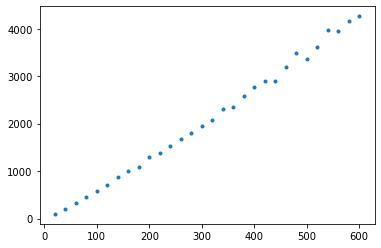

In [17]:
#random_graph

N = []
P = 0.25
Times = []

for i in range(20):
    N+= [20+i*50]    

for i in range(len(N)):
    G = nx.erdos_renyi_graph(N[i], P)
    while min([d for n, d in G.degree()]) == 0:
          G = nx.erdos_renyi_graph(N[i], P)
    Times += [time_nodes(G,explorations_per_graph)]  

plt.plot(N, Times, '.', label = 'exploration_time')
    


In [ ]:
#scale-free-graph

N = []
M = 3
P = 0.25
Times = []

for i in range(20):
    N+= [20+i*10]    

for i in range(len(N)):
    G = nx.barabasi_albert_graph(N[i], M)
    Times += [time_nodes(G,explorations_per_graph)]  

plt.plot(N, Times, '.', label = 'exploration_time')
    